<a href="https://colab.research.google.com/github/Pareiollya/CALCULO_NUMERICO/blob/main/matodos_unidade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import sympy as sym 

gerar um grafico

In [109]:
def showPlot(f, intervalo1, intervalo2):
  # Definir o intervalo
  x = np.linspace(intervalo1, intervalo2, 1000)

  # Calcular os valores da função para cada ponto no intervalo
  y = f(x)

  # Criar o gráfico
  plt.plot(x, y)
  plt.axhline(y=0, color='black', linestyle='--')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Gráfico da função f(x)')
  plt.show()

# Definir a função
# def f(x):
#     return x**3 - 9*x + 3
#     # return x**2 + x - 6

# showPlot(f)



FUNÇÃO e DERIVADA.

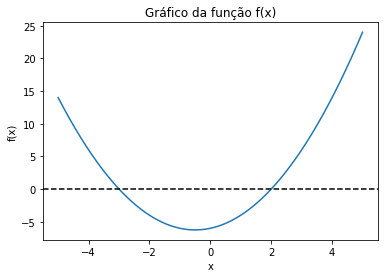

In [110]:
def f(x):
    #  x**3 - 9*x + 3 
    return x**2 + x - 6  

def df(x):
    # 2*x + 1
    return  3*x**2 - 9


showPlot(f, -5, 5)

VARIÁVEIS GLOBAIS


In [111]:
#pontos de intervalo
x0 = 1.5
x1 = 1.7

#configurações de iteração
tolerancia = 1e-6
max_iter = 100


.

BISSEÇÃO

In [112]:
def bissecao(f, a, b, tol = 1e-6, max_iter = 100):
    iter = 0
    c = 0
    if f(a) * f(b) >= 0:
        print(f"O método não convergiu em {max_iter} iterações, resultado {x1}")
        return None
    while abs((b-a)/2) > tol and iter < max_iter:
        c = (a + b)/2
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        iter += 1
        
    # print(f"A raiz aproximada da função é {c} com {iter} iterações.")
    return c, iter

    

In [113]:
def f(x):
    return x**3 - 9*x + 3 

x, i = bissecao(f, 0, 1, 1e-3, 100)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.337890625 com 9 iterações.


.

POSIÇÃO FALSA


In [114]:
def posicao_falsa(f, a, b, tol = 1e-6, max_iter = 100):
    i = 0
    while i < max_iter:
        fa = f(a)
        fb = f(b)
        c = (a*fb - b*fa) / (fb - fa)
        if abs(f(c)) < tol:
            return c, i
        elif fa * f(c) < 0:
            b = c
        else:
            a = c
        i += 1
    raise Exception(f"O método não convergiu em {max_iter} iterações, resultado {x1}")

In [115]:
def f(x):
    return x**3 - 9*x + 3 

x, i = posicao_falsa(f, 0, 1, 1e-3, 100)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.33763504551140067 com 2 iterações.


.

NEWTON


In [116]:

def newton(f, df, x0, tol = 1e-6, max_iter = 100):
    i = 0
    while i < max_iter:
        fx = f(x0)
        dfx = df(x0)
        x1 = x0 - fx / dfx
        if abs(x1 - x0) < tol:
            return x1, i
        x0 = x1
        i += 1
    raise Exception(f"O método não convergiu em {max_iter} iterações")


In [117]:
#função para calcular derivada e retornar a derivada de uma função.
import sympy as sym 

def derivada (f, x):
  function_symbol = sym.Symbol('x')
  df = sym.diff(f, function_symbol)
  df_value = df.subs(function_symbol, x)

  print(f'Função derivada: {df}')

  return df_value

def derivada_aprox(f,x, h=1e-6):
    return (f(x+h) - f(x-h)) / (2*h)

In [118]:

def newton_auto(f, x0, tol=1e-6, max_iter=100): #já com a derivada integrada, evitando-a como parâmetro
    i = 0
    x = sym.Symbol('x')
    df = sym.diff(f(0,1), x)
    df_lambda = sym.lambdify(x, df)

    while i < max_iter:
        fx = f(x0)
        dfx = df_lambda(x0)
        x1 = x0 - fx / dfx
        if abs(x1 - x0) < tol:
            return x1, i
        x0 = x1
        i += 1
    raise Exception(f"O método não convergiu em {max_iter} iterações, resultado {x1}")

def newton_auto_aprox(f, x0, tol=1e-6, max_iter=100): #já com a derivada integrada por aproximação, evitando-a como parâmetro
    i = 0
    while i < max_iter:
        x1 = x0 - f(x0) / derivada_aprox(f,x0, h=1e-6)
        if abs(x1 - x0) < tol:
            return x1, i
        x0 = x1
        i += 1
    raise Exception(f"O método não convergiu em {max_iter} iterações, resultado {x1}")

In [119]:
def f(x = 0, t = 0): #função modificada para funcionar com o método automatico
    if(t == 0):
      return x**3 - 9*x + 3 
    else:
      return 'x**3 - 9*x + 3'

def df(x):
    # 2*x + 1
   return  3*x**2 - 9

x, i = newton(f, df, 0)
print(f"A raiz aproximada da função é {x} com {i} iterações.")
print()

x, i = newton_auto(f, 0)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.33760895596583773 com 3 iterações.

A raiz aproximada da função é 0.33760895596583773 com 3 iterações.


.
.


SECANTE

In [120]:
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Encontra uma raiz da função f utilizando o método da secante
    a partir dos pontos iniciais x0 e x1
    """
    iter = 0
    while abs(x1 - x0) > tol and iter < max_iter:
        # Calcula o próximo ponto x2
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        # Atualiza os pontos x0 e x1
        x0 = x1
        x1 = x2
        iter += 1
    return x1, iter

In [121]:
def f(x):
    return x**3 - 9*x + 3 

x, i = secante(f, 0, 1)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.33760895596578694 com 5 iterações.


.

CONSTANTES
- math.e: a constante matemática e, aproximadamente igual a 2.718281828459045
- math.pi: a constante matemática pi, aproximadamente igual a 3.141592653589793

ANGULARES

- math.radians(angulo_graus) -> clacular grau radiano
- math.sin(x): retorna o seno do ângulo x.
- math.cos(x): retorna o cosseno do ângulo x.
- math.tan(x): retorna a tangente do ângulo x.
- math.asin(x): retorna o arco seno do valor x. O resultado é dado em radianos e está no intervalo [-π/2, π/2].
- math.acos(x): retorna o arco cosseno do valor x. O resultado é dado em radianos e está no intervalo [0, π].
- math.atan(x): retorna o arco tangente do valor x. O resultado é dado em radianos e está no intervalo [-π/2, π/2].
- math.atan2(y, x): retorna o arco tangente de y/x. O resultado é dado em radianos e está no intervalo [-π, π].

#ATIVIDADES 

In [122]:
def f(i):
  a = ( i * ( 1 + i )**6)
  b = ( 1 + i )**6 - 1 
  c = a / b
  d = 20000 * c
  final = d - 4000
  return final

def df(x):
  a =20000 * ( -(x + 1)**6 * (5*x**4 + 24*x**3 + 45*x**2 + 40*x + 15 + 6) * (x + 1)**5 * (x+2) * (x**4 + 4*x**3 + 7*x**2 + 6*x +3))
  b = (x+2)**2 * (x**4 + 4*x**3 + 7*x**2 + 6*x +3)**2
  c = a / b
  return  c

def parte1 (i0, i1):
  return i0 * f(i1)- i1 * f(i0)

def parte2 (i0, i1):
  return f(i1) - f(i0)

def parte3 (a, b):
  return a / b

# print(f(0.0570), f(0.054464))

# print(parte1(0.15, 0.054464))
# print(parte2(0.15, 0.054464))

# secante(f, 0.05,0.15, 0.05, 100)
x, i = bissecao(f, 0.05, 0.15, 0.0000000001, 1000)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i = posicao_falsa(f, 0.05, 0.15, 0.0000000001, 1000)
print(f"Raiz aproximada: {x}, {i} iterações.")

print(df(0.01))
x, i = newton(f, df, 0.01, 0.000001, 1000000)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

Raiz aproximada: 0.05471792500466108, 29 iterações.
Raiz aproximada: 0.054717925023534224, 9 iterações.
-77634.23764321324
A raiz aproximada da função é 4.122508491634543 com 11 iterações.


In [123]:
import numpy as np

def f(x):
    return x**3 - 9*x + 3 
def df(x):
    # 2*x + 1
   return  3*x**2 - 9

# Defina a função
x = sym.Symbol('x')
f = x**3 - 9*x + 3 

# Calcule a derivada em um ponto específico
df = sym.diff(f, x)
x0 = 3
df_value = df.subs(x, x0)

# Imprima o valor da derivada em um ponto específico
print(df_value)

def derivada (f, x):
  function_symbol = sym.Symbol('x')
  df = sym.diff(f, function_symbol)
  # print(df)
  df_value = df.subs(function_symbol, x)
  return df, df_value

f = 20000 * x - 24000

print(derivada(f, 0.1))

def df(x):
  return 20000

def f(i):
  a = ( i * ( 1 + i )**6)
  b = ( 1 + i )**6 - 1 
  c = a / b
  d = 20000 * c
  final = d - 4000
  return final
x, i = newton(f, df, 0.01, 0.000001, 1000000)
print(f"A raiz aproximada da função é {x} com {i} iterações.")


# f = 'cos(x)'
# derivada(f, 1)

f = '80 + 90 * cos( (3.14159265358979323846 / 3) * x) '
função, resultado = derivada(f, 1)

print(função)



18
(20000, 20000)
A raiz aproximada da função é 0.05471764549595901 com 11 iterações.
-94.2477796076937971538*sin(1.04719755119659774615*x)


calcular radiano caso haja um coseno

In [128]:
# def cos1(x):
#   return m.cos(m.pi / 3 * x)
# def sin1(x):
#   return m.sin(m.pi / 3 * x)

# print(cos1(3.454437353))
# print(sin1(3.454437353))
# print(3.454437353 - (80 + (90* -0.88888731) ) / (-94.247 * -0.45812589))
# print((3.454437 - 3.454434) < 0.001)

def f(x):
  return 80 + 90 * m.cos ( (3.141592653589793/3) * x)

f2 = '80 + 90 * cos( (3.141592653589793/3) * x)'
print(derivada(f2,4))

derivada_aprox(f,4)

def f(x , t = 0): #função modificada para funcionar com o método automatico
    if(t == 0):
      return 80 + 90 * m.cos ( (3.141592653589793/3) * x) 
    else:
      return '80 + 90 * cos( (3.141592653589793/3) * x)'


print(newton_auto(f, 4,0.001,max_iter=100))
newton_auto_aprox(f,4,tol=0.001)

x, i = bissecao(f, 3, 4, 0.0000000001, 10000000)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i = posicao_falsa(f, 3, 4, 0.0000000001, 1000)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i = secante(f, 3, 4, 0.0000000001, 1000)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i = newton_auto(f, 4, 0.000001, 1000)
print(f"Raiz aproximada: {x}, {i} iterações.")


# KKKKKKKKKKKKKKKKKKKKKKKK


(-94.24777960769379*sin(1.047197551196598*x), 81.62097139053978)
(3.454434087493587, 3)
Raiz aproximada: 3.454434074112214, 33 iterações.
Raiz aproximada: 3.4544340741766617, 23 iterações.
Raiz aproximada: 3.4544340741788804, 8 iterações.
Raiz aproximada: 3.454434074178881, 4 iterações.
